25.11.2023, author: Barbir Vladyslav, Lab:07

# OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version)

__Мета:__ знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

# Хід Роботи

1.Реалізувати фільтр на основі ядра Гауса

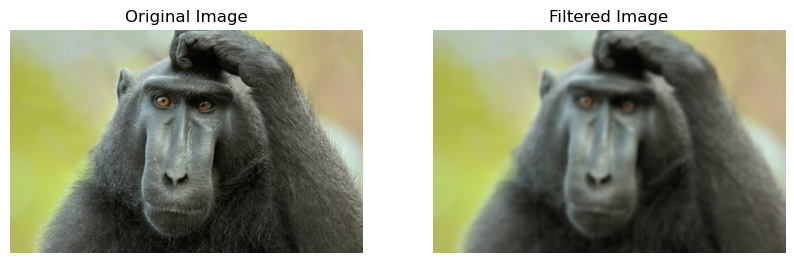

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    if kernel_size % 2 == 0:
        kernel_size += 1
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * 
                     np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2) / (2*sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image
image = cv2.imread('img/123.jpg')
filtered_image = gaussian_filter(image, sigma=2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')
plt.show()



Гаусівський фільтр використовує ядро Гауса для згладжування зображення. Ядро Гауса визначає ваги, які відповідають гаусівському розподілу, і застосовуються до околів кожного пікселя на зображенні.

Формула гаусівського ядра зазвичай виглядає так:

$K(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$

де:
- $K(x,y)$ - значення ядра в позиції $(x,y)$,
- $σ$ - стандартне відхилення гаусівського розподілу,
- $π$ - математична константа $π (pi)$,
- $e$ - число Ейлера, приблизно рівне 2.71828.

Гаусівський фільтр може бути використаний для гладкої зменшення впливу високочастотних компонентів на зображення, призводячи до згладженого ефекту. Велике значення σ призводить до більшої згладженості, а менше значення - до меншої.

2.Написати процедуру, яка б зашумлювала нормальним шумом з параметрами зображення

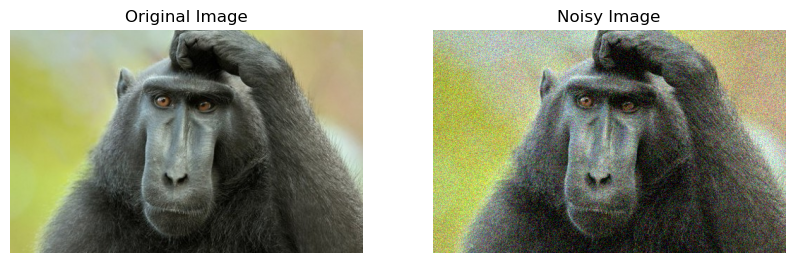

In [8]:
import numpy as np
import cv2
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image
image = cv2.imread('img/123.jpg')
noisy_image = add_gaussian_noise(image, mean=0, sigma=25)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')
plt.show()


3.Взявши за основу власний портрет, зашумити його нормальним шумом

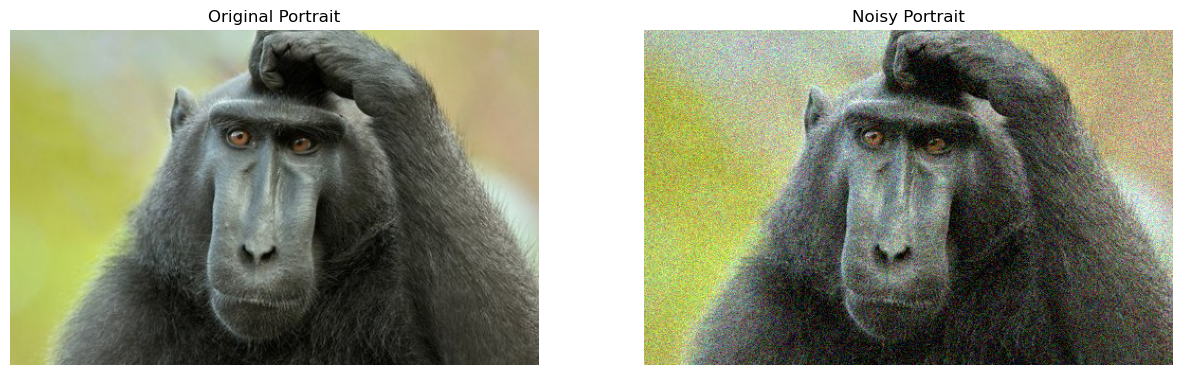

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=30):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image
portrait_image = cv2.imread('img/123.jpg')
noisy_portrait = add_gaussian_noise(portrait_image, mean=0, sigma=25)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(portrait_image, cv2.COLOR_BGR2RGB))
plt.title('Original Portrait')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_portrait, cv2.COLOR_BGR2RGB))
plt.title('Noisy Portrait')
plt.axis('off')
plt.show()


4.Реалізувати медіанний фільтр і продемонструвати послідовно роботу медіанного і гаусового фільтру, оптимально підібравши і обґрунтувавши значення параметрів.

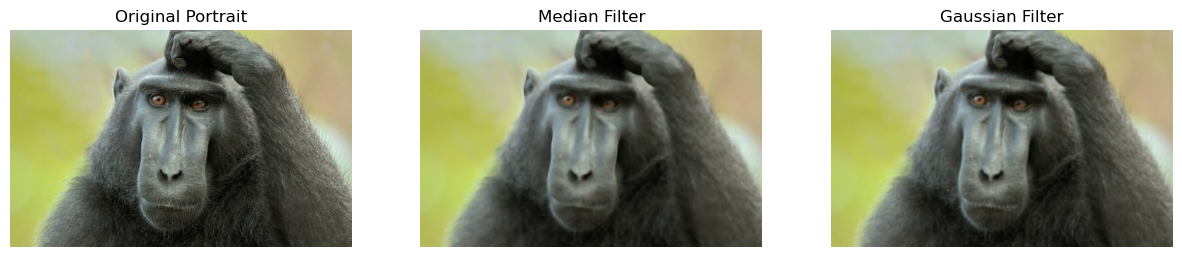

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    if kernel_size % 2 == 0:
        kernel_size += 1
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
portrait_image = cv2.imread('img/123.jpg')
median_filtered_portrait = median_filter(portrait_image, kernel_size=5)
gaussian_filtered_portrait = gaussian_filter(portrait_image, sigma=1)
plt.figure(figsize=(15, 5))

# Оригінальний портрет
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(portrait_image, cv2.COLOR_BGR2RGB))
plt.title('Original Portrait')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Median Filter')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filter')
plt.axis('off')

# Показати графіки
plt.show()


5.Реалізувати двосторонній фільтр

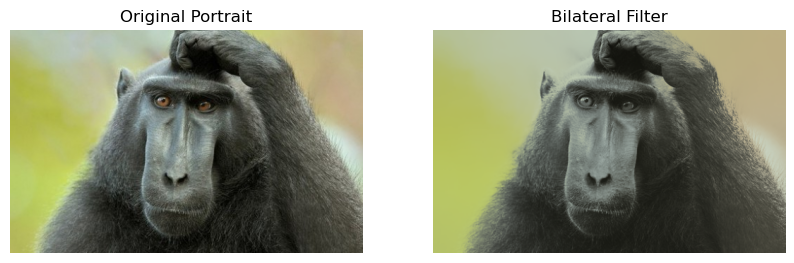

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilateral_filter(image, spatial_sigma=75, intensity_sigma=75):
    bilateral_filtered_image = cv2.bilateralFilter(image, d=0, sigmaColor=intensity_sigma, sigmaSpace=spatial_sigma)
    return bilateral_filtered_image
portrait_image = cv2.imread('img/123.jpg')
bilateral_filtered_portrait = bilateral_filter(portrait_image, spatial_sigma=75, intensity_sigma=75)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(portrait_image, cv2.COLOR_BGR2RGB))
plt.title('Original Portrait')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')
plt.axis('off')
plt.show()


Двосторонній фільтр - це метод обробки зображень, який використовує інформацію як з локального, так і з глобального оточення кожного пікселя для зменшення впливу шуму та покращення контрасту зображення.
Градаційне перетворення вводить плавні переходи між значеннями пікселів, забезпечуючи плавніше згладжування та зменшуючи вплив різких перепадів яскравості. Формула градаційного перетворення може виглядати наступним чином:

$I_{\text{вихід}}(x, y) = a \cdot I_{\text{вхід}}(x, y) + b$

де $I_{\text{вихід}}(x, y)$ - це значення пікселя вхідного зображення у позначеному пікселі 
(x,y),  $I_{\text{вхід}}(x, y)$ - значення пікселя вихідного зображення, a та b - параметри градаційного перетворення.

Ця формула дає можливість регулювати яскравість та контраст зображення шляхом зміни значень параметрів 
a та b. Часто це використовується у фільтрах для покращення якості зображень та виділення деяких деталей.

6.Написати процедуру, до складу якої б входили всі низькочастотні фільтри, які досліджуються в цій лабораторній роботі, а вибір потрібного задавався відповідним вхідним параметром.

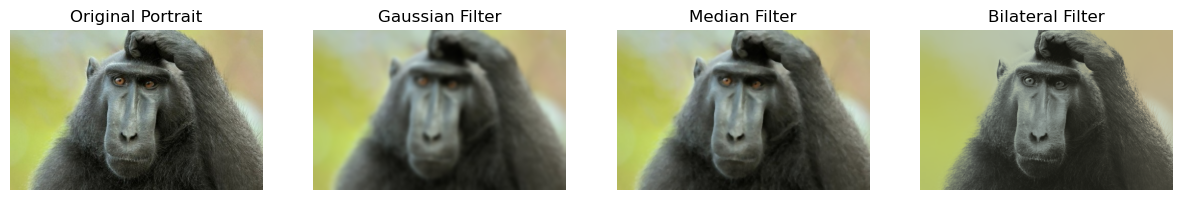

In [13]:
import cv2
import matplotlib.pyplot as plt

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    if kernel_size % 2 == 0:
        kernel_size += 1
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def bilateral_filter(image):
    return cv2.bilateralFilter(image, d=0, sigmaColor=75, sigmaSpace=75)

def apply_low_pass_filters(image):
    # Гаусівський фільтр
    gaussian_filtered_image = gaussian_filter(image, sigma=3)

    # Медіанний фільтр
    median_filtered_image = median_filter(image, kernel_size=5)

    # Двосторонній фільтр
    bilateral_filtered_image = bilateral_filter(image)

    return gaussian_filtered_image, median_filtered_image, bilateral_filtered_image
portrait_image = cv2.imread('img/123.jpg')

gaussian_filtered_portrait, median_filtered_portrait, bilateral_filtered_portrait = apply_low_pass_filters(portrait_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(portrait_image, cv2.COLOR_BGR2RGB))
plt.title('Original Portrait')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(gaussian_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(median_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Median Filter')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(bilateral_filtered_portrait, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')
plt.axis('off')

# Показати графіки
plt.show()



# Контрольні запитання

1.У чому полягає сенс градаційних перетворень?

Градаційні перетворення в зображенні дозволяють регулювати яскравість та контрастність, сприяючи поліпшенню візуальних характеристик. Зміна параметрів градаційного перетворення, таких як коефіцієнти a та b, дозволяє адаптувати зображення до різних умов освітлення. Підвищення контрасту може виділяти різниці між темними та світлими областями, що поліпшує видимість деталей. Зміна яскравості за допомогою градаційного перетворення може бути ефективним засобом виправлення експозиції та створення різних настроїв у фотографіях. Крім того, цей підхід може бути використаний для зменшення впливу шуму та підсилення ключових деталей, що робить зображення більш привабливим та інформативним. Градаційні перетворення широко використовуються в галузі графічного дизайну, фотографії та обробки зображень для досягнення кращого візуального виразу та якості зображень.

2.На чому ґрунтуються гістограмні методи?

Гістограмні методи обробки зображень базуються на аналізі гістограми, яка відображає розподіл яскравості пікселів у зображенні. Автоматичне регулювання контрастності використовується для поліпшення візуальних властивостей зображення, розтягуючи чи стискаючи гістограму. Еквалізація гістограми розподіляє значення яскравості так, щоб всі рівні стали рівномірними, покращуючи глобальну контрастність. Гістограмні методи також використовуються для адаптивного виправлення контрасту в різних областях зображення, що дозволяє ефективно враховувати локальні особливості. Крім того, гістограмні методи використовуються для бінаризації, визначення порогових значень та виявлення піков та впадин у гістограмі, що корисно при сегментації та виявленні об'єктів на зображеннях. Ці методи є важливим інструментом в області обробки та аналізу зображень.

# References

1.https://github.com/Vlad1364/test_project/tree/master - посилання на GitHub-репозиторій

2.Image Processing (imgproc module). https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html